# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#2.1

data_path = "../data/netflix_titles.csv"

movies_df = pd.read_csv(data_path, index_col="show_id")

movies_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [39]:
#2.2

min_year = movies_df["release_year"].min()
max_year = movies_df["release_year"].max()

print(f"Min year: {min_year}, Max year: {max_year}")

Min year: 1925, Max year: 2021


In [40]:
#2.3
num_missing_directors = movies_df["director"].isna().sum()

print(f"Number of missing directors: {num_missing_directors}")

Number of missing directors: 2634


In [41]:
#2.4

countries_series = movies_df["country"].fillna("Unknown")

countries_list = []

for c in countries_series:
    countries_list.extend(c.split(", "))

n_countries = len(set(countries_list))

print(f"There are {n_countries} different countries in the data")

There are 128 different countries in the data


In [42]:
#2.5
avg_title_length = movies_df["title"].apply(lambda x: len(x)).mean()

print(f"The average title length is {avg_title_length} characters")

The average title length is 17.725899852390143 characters


country
United States     336
India              75
United Kingdom     44
South Korea        28
Canada             26
Spain              21
Germany            20
Japan              20
Brazil             20
Mexico             18
Name: count, dtype: int64


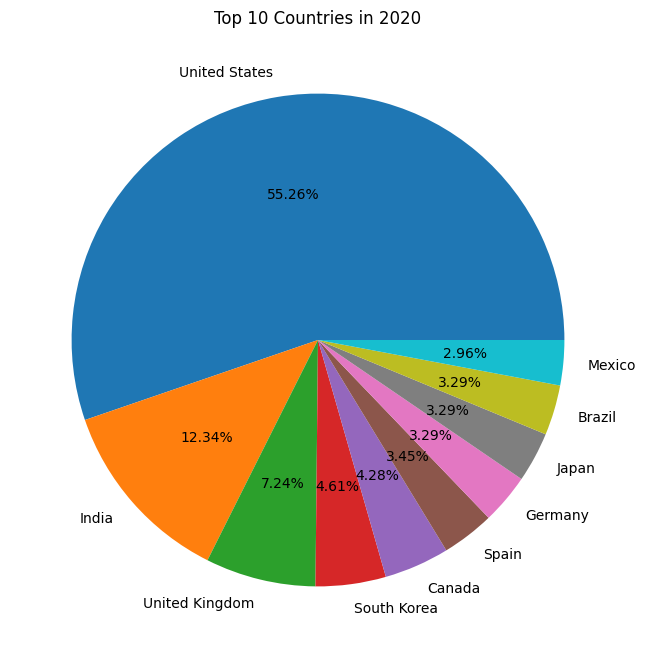

In [43]:
#2.6
year = 2020   

top_10_countries =  (
    movies_df.loc[movies_df["release_year"] == year, "country"]
    .value_counts()
    .head(10)
)

print(top_10_countries)

fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()


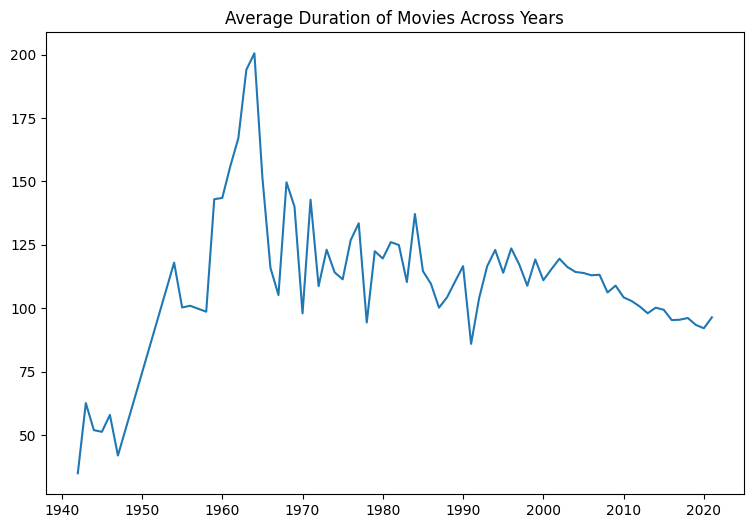

In [44]:
#2.7

movies_avg_duration_per_year = movies_df["duration_minutes"] = movies_df["duration"].apply(
    lambda x: int(x.split(" ")[0]) if "min" in x else None
)

movies_avg_duration_per_year = (
    movies_df[movies_df["type"] == "Movie"]
    .groupby("release_year")["duration_minutes"]
    .mean()
)  

fig = plt.figure(figsize=(9, 6))

plt.plot(
    movies_avg_duration_per_year.index,
    movies_avg_duration_per_year.values
)
plt.title("Average Duration of Movies Across Years")

plt.show()